In [6]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dat = sm.datasets.get_rdataset('Guerry','HistData').data

In [7]:
dat.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [4]:
result = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat)

In [5]:
result.summary()

AttributeError: 'OLS' object has no attribute 'summary'

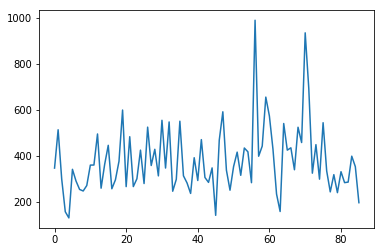

In [15]:
dat.Pop1831.plot()

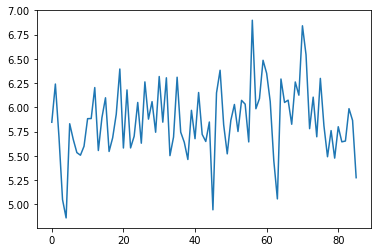

In [16]:
np.log(dat.Pop1831).plot()

In [45]:
df = sm.datasets.macrodata.load_pandas().data

In [46]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1','2009Q3'))

In [27]:
df = df.set_index('year')

In [47]:
df.index = index

In [48]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


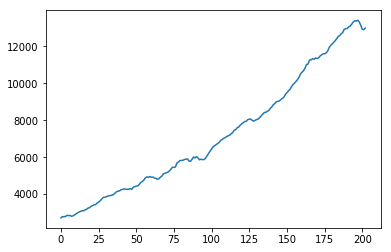

In [33]:
df['realgdp'].plot()

In [50]:
result = sm.tsa.filters.hpfilter(df['realgdp'])

In [36]:
type(result)

tuple

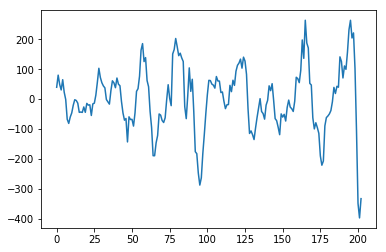

In [40]:
result[0].plot()

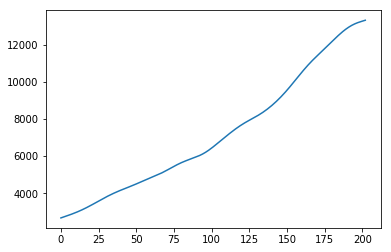

In [39]:
result[1].plot()

In [51]:
df['trend'] = result[1]

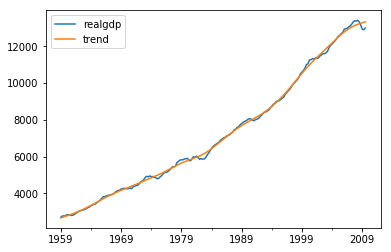

In [52]:
df[['realgdp','trend']].plot()

In [12]:
ndf = pd.read_csv('temp_data.csv')

In [13]:
ndf.head()

,Date Time,Tin,Tout,GasUsed,Srd
0,2018-11-01 00:00:00,14.316636,7.983,0.0,1
1,2018-11-01 01:00:00,14.229545,8.082,0.0,0
2,2018-11-01 02:00:00,14.142273,8.182,0.0,2
3,2018-11-01 03:00:00,14.072636,8.481,0.0,2
4,2018-11-01 04:00:00,13.994000,8.581,0.0,3


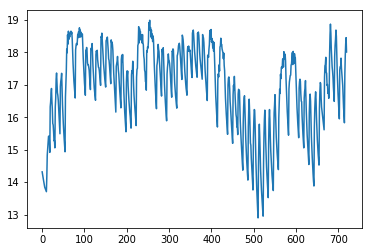

In [55]:
ndf['Tin'].plot()

In [14]:
temp_result = sm.tsa.filters.hpfilter(ndf['Tin'])

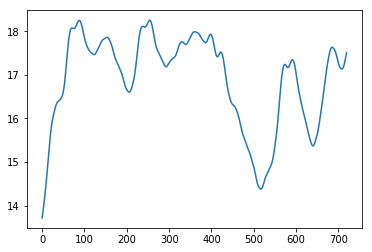

In [15]:
temp_result[1].plot()

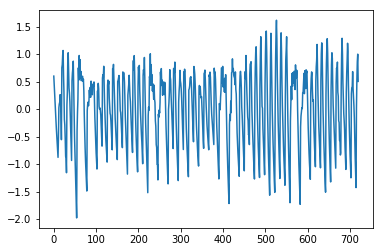

In [58]:
temp_result[0].plot()

In [60]:
ndf['Trend'] = temp_result[1]

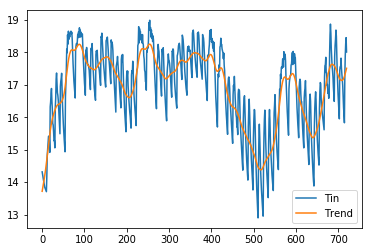

In [61]:
ndf[['Tin','Trend']].plot()

In [62]:
ndf.head()

,Date Time,Tin,Tout,GasUsed,Srd,Trend
0,2018-11-01 00:00:00,14.316636,7.983,0.0,1,13.717869
1,2018-11-01 01:00:00,14.229545,8.082,0.0,0,13.793770
2,2018-11-01 02:00:00,14.142273,8.182,0.0,2,13.870045
3,2018-11-01 03:00:00,14.072636,8.481,0.0,2,13.947341
4,2018-11-01 04:00:00,13.994000,8.581,0.0,3,14.026474


In [65]:
ndf = ndf.set_index('Date Time')

In [82]:
ndf.head()

,Tin,Tout,GasUsed,Srd,Trend
Date Time,,,,,
2018-11-01 00:00:00,14.316636,7.983,0.0,1,13.717869
2018-11-01 01:00:00,14.229545,8.082,0.0,0,13.793770
2018-11-01 02:00:00,14.142273,8.182,0.0,2,13.870045
2018-11-01 03:00:00,14.072636,8.481,0.0,2,13.947341
2018-11-01 04:00:00,13.994000,8.581,0.0,3,14.026474


In [19]:
newdf = pd.read_csv('measured_values.csv', skiprows=1,
                   parse_dates=True, index_col=0)

In [20]:
newdf.head()

,Tout,AllTin,OtherAvT,ROOM1,GasUsed
Date Time,,,,,
2018-11-01 00:00:00,7.983,14.316636,14.3733,13.750,0.0
2018-11-01 01:00:00,8.082,14.229545,14.2871,13.654,0.0
2018-11-01 02:00:00,8.182,14.142273,14.2007,13.558,0.0
2018-11-01 03:00:00,8.481,14.072636,14.1241,13.558,0.0
2018-11-01 04:00:00,8.581,13.994000,14.0473,13.461,0.0


In [21]:
ndf['ROOM1'] = newdf['ROOM1']

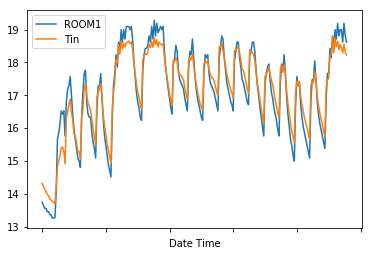

In [142]:
ndf[['ROOM1','Tin']]['2018-11-01':'2018-11-11'].plot()

In [143]:
ndf['Daily'] = ndf['ROOM1'].rolling(window=24).mean()

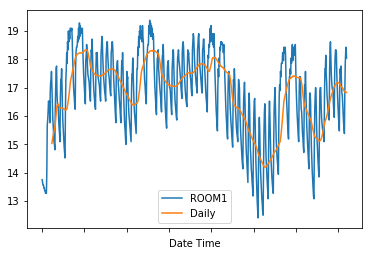

In [144]:
ndf[['ROOM1','Daily']].plot()

In [22]:
new_temp = ndf[['ROOM1']]

In [146]:
new_temp['6-Hour'],new_temp['Daily'] = (ndf['ROOM1'].rolling(window=6).mean(), 
ndf['ROOM1'].rolling(window=24).mean())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


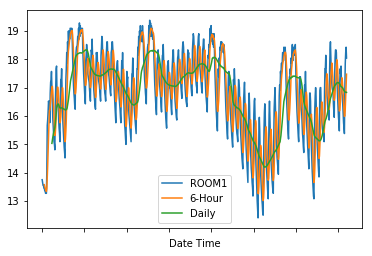

In [147]:
new_temp.plot()

In [18]:
new_temp['EWMA-6Hr'] = new_temp['ROOM1'].ewm(span=6).mean()

NameError: name 'new_temp' is not defined

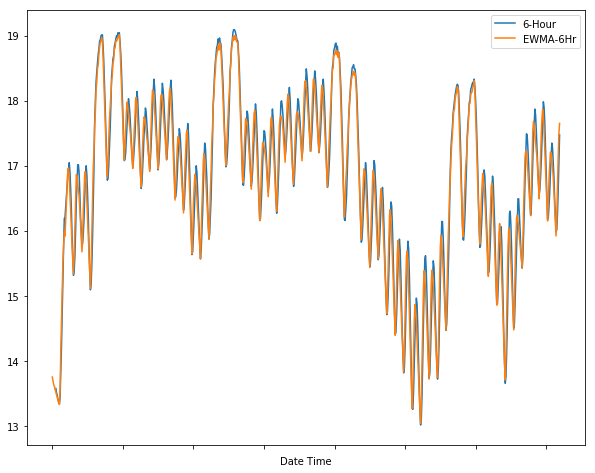

In [149]:
new_temp[['6-Hour','EWMA-6Hr']].plot(figsize=(10,8))

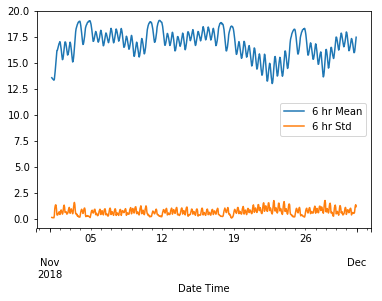

In [197]:
new_temp['ROOM1'].rolling(6).mean().plot(label='6 hr Mean')
new_temp['ROOM1'].rolling(6).std().plot(label='6 hr Std')
plt.legend()

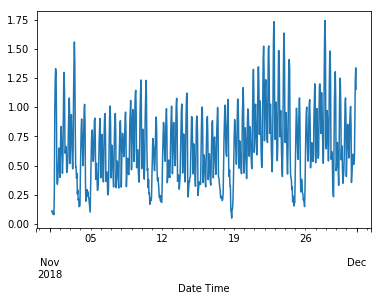

In [198]:
new_temp['ROOM1'].rolling(6).std().plot(label='6 hr Std')

In [150]:
#ETS decomposition

In [153]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [159]:
airline = pd.read_csv('AirPassengers.csv', index_col='TravelDate')

In [160]:
airline.head()

,Passengers
TravelDate,
1/1/1949,112
2/1/1949,118
3/1/1949,132
4/1/1949,129
5/1/1949,121


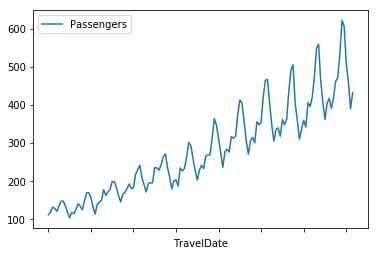

In [161]:
airline.plot()

In [162]:
airline.dropna(inplace=True)

In [163]:
airline.index = pd.to_datetime(airline.index)

In [164]:
airline.head()

,Passengers
TravelDate,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


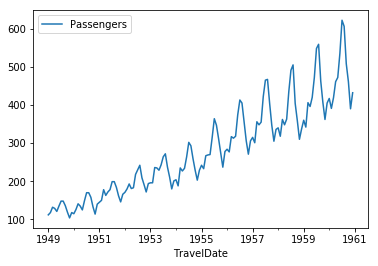

In [165]:
airline.plot()

In [166]:
result = seasonal_decompose(airline['Passengers'], model='additive')

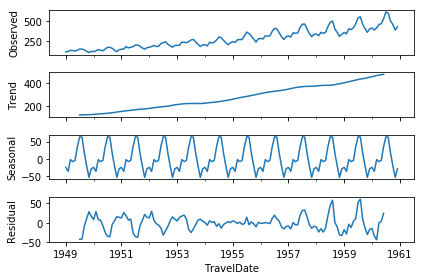

In [169]:
fig = result.plot()

In [ ]:
Works fine when you convert your index to DateTimeIndex:

df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
s=sm.tsa.seasonal_decompose(df.divida)

<statsmodels.tsa.seasonal.DecomposeResult object at 0x110ec3710>

In [173]:
new_temp.index

Index(['2018-11-01 00:00:00', '2018-11-01 01:00:00', '2018-11-01 02:00:00',
       '2018-11-01 03:00:00', '2018-11-01 04:00:00', '2018-11-01 05:00:00',
       '2018-11-01 06:00:00', '2018-11-01 07:00:00', '2018-11-01 08:00:00',
       '2018-11-01 09:00:00',
       ...
       '2018-11-30 14:00:00', '2018-11-30 15:00:00', '2018-11-30 16:00:00',
       '2018-11-30 17:00:00', '2018-11-30 18:00:00', '2018-11-30 19:00:00',
       '2018-11-30 20:00:00', '2018-11-30 21:00:00', '2018-11-30 22:00:00',
       '2018-11-30 23:00:00'],
      dtype='object', name='Date Time', length=720)

In [175]:
new_temp.index = pd.to_datetime(new_temp.index)

In [176]:
new_temp.index

DatetimeIndex(['2018-11-01 00:00:00', '2018-11-01 01:00:00',
               '2018-11-01 02:00:00', '2018-11-01 03:00:00',
               '2018-11-01 04:00:00', '2018-11-01 05:00:00',
               '2018-11-01 06:00:00', '2018-11-01 07:00:00',
               '2018-11-01 08:00:00', '2018-11-01 09:00:00',
               ...
               '2018-11-30 14:00:00', '2018-11-30 15:00:00',
               '2018-11-30 16:00:00', '2018-11-30 17:00:00',
               '2018-11-30 18:00:00', '2018-11-30 19:00:00',
               '2018-11-30 20:00:00', '2018-11-30 21:00:00',
               '2018-11-30 22:00:00', '2018-11-30 23:00:00'],
              dtype='datetime64[ns]', name='Date Time', length=720, freq=None)

In [181]:
result1 = seasonal_decompose(new_temp['ROOM1'], model='additive')

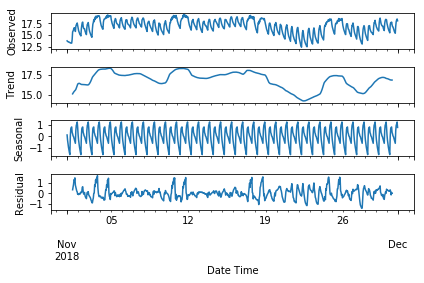

In [184]:
fig = result1.plot()

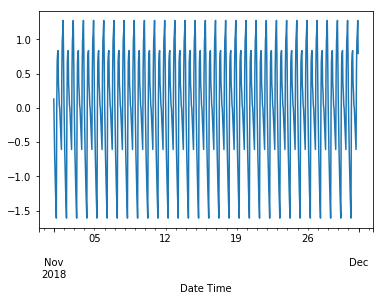

In [185]:
result1.seasonal.plot()

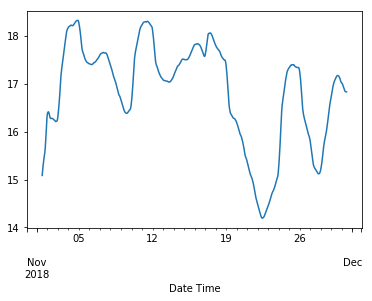

In [186]:
result1.trend.plot()

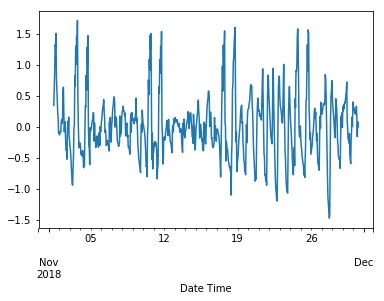

In [190]:
result1.resid.plot()

In [200]:
result6hr = seasonal_decompose(new_temp['6-Hour'].dropna(), model='additive', freq=24)

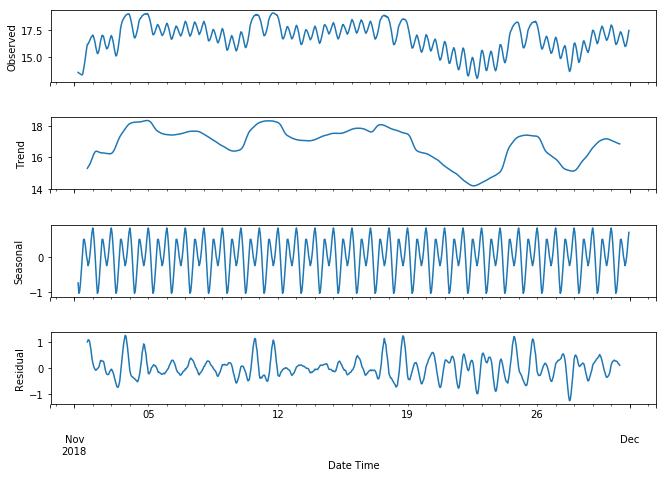

In [201]:
fig = result6hr.plot()
fig.set_size_inches(10,8)

In [ ]:
##ARIMA Code

In [202]:
#Testing stationarity

In [203]:
from statsmodels.tsa.stattools import adfuller

In [204]:
test_result = adfuller(new_temp['ROOM1'],)

In [208]:
test_result[1]

0.16755462711851649

In [210]:
def adcheck(x):
    result = adfuller(x)
    print('Dicky Fuller Test')
    lab = ['ADF Test Statistic','p-value','# of lags','No. of Obsr.']
    for value, label in zip(result,lab):
        print(label,':',str(value))
    if result[1] <= 0.05:
        print('Is stationary')
    else:
        print('Not stationary')

In [211]:
adcheck(new_temp['ROOM1'])

Dicky Fuller Test
ADF Test Statistic : -2.3138037556406754
p-value : 0.16755462711851649
# of lags : 19
No. of Obsr. : 700
Not stationary


In [213]:
new_temp['Diff1'] = new_temp['ROOM1'] - new_temp['ROOM1'].shift(1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


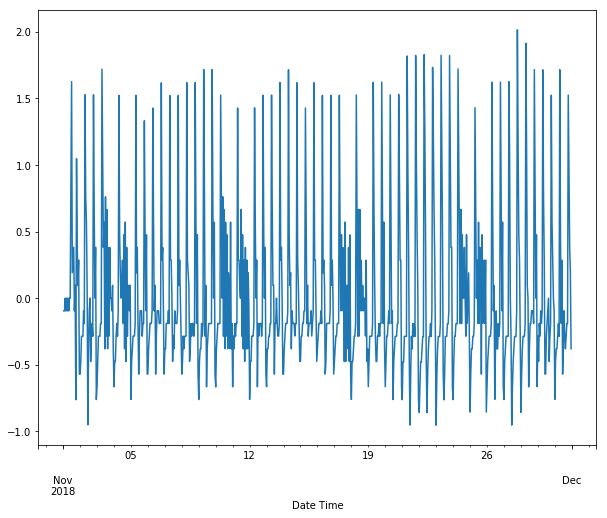

In [215]:
new_temp['Diff1'].plot(figsize=(10,8))

In [218]:
adcheck(new_temp['Diff1'].dropna())

Dicky Fuller Test
ADF Test Statistic : -10.780799280982897
p-value : 2.2578957075503737e-19
# of lags : 20
No. of Obsr. : 698
Is stationary


In [219]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

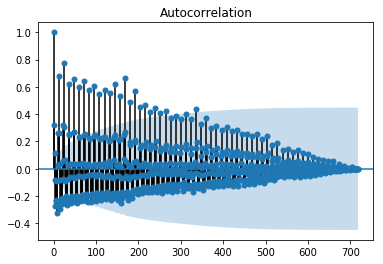

In [222]:
fig_first = plot_acf(new_temp['Diff1'].dropna())

In [223]:
from pandas.plotting import autocorrelation_plot

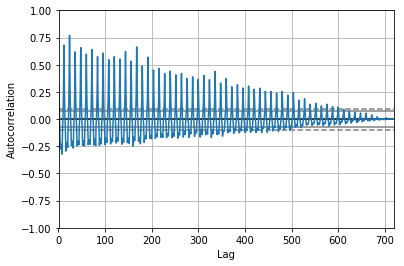

In [226]:
autocorrelation_plot(new_temp['Diff1'].dropna())

In [227]:
from statsmodels.tsa.arima_model import ARIMA

In [33]:
model = sm.tsa.statespace.SARIMAX(new_temp['ROOM1'], order=(0,1,0),
                         seasonal_order=(1,1,1,6))

In [34]:
results = model.fit()

ValueError: maxlag should be < nobs

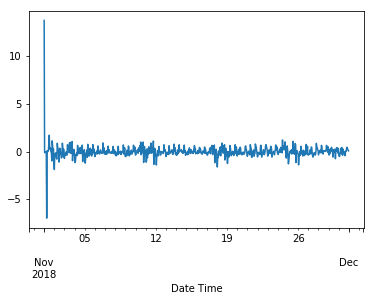

In [301]:
results.resid.plot()

In [24]:
new_temp['forecast'] = results.predict(start='2018-11-28', end='2018-12-05')

NameError: name 'results' is not defined

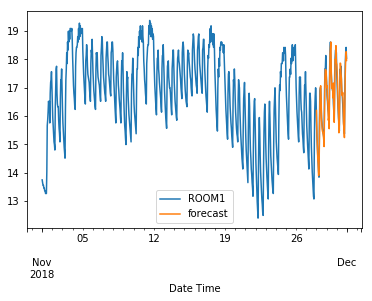

In [303]:
new_temp[['ROOM1','forecast']].plot()

In [304]:
max(abs((new_temp['forecast'] - new_temp['ROOM1']).dropna()))

0.7421176105649394

In [28]:
lst1 = []

In [30]:
model = sm.tsa.statespace.SARIMAX(new_temp['ROOM1'], order=(0,1,0), seasonal_order=(1,1,1,1))
results = model.fit()

ValueError: maxlag should be < nobs

In [25]:
for num in lst:
    model = sm.tsa.statespace.SARIMAX(new_temp['ROOM1'], order=(0,1,0),
                            seasonal_order=(1,1,1,x))
    results = model.fit()
    new_temp['forecast'] = results.predict(start='2018-11-28', end='2018-11-30')
    lst1.append(max(abs((new_temp['forecast'] - new_temp['ROOM1']).dropna())))

ValueError: maxlag should be < nobs

In [1]:
lst = [1,6,12,18,24,48,72]
lsta = []
for x in lst:
    lsta.append(x*2)

In [4]:
lsta

[2, 12, 24, 36, 48, 96, 144]

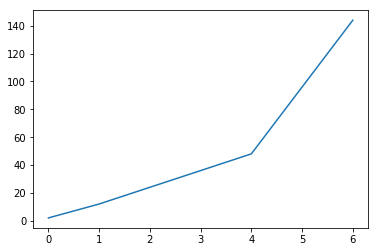

In [7]:
plt.plot(lsta)